In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfgrpby = df1.groupby('Year')['Difference from Previous Year'].count()

dfgrpby = pd.DataFrame(dfgrpby)
sns.scatterplot(data = dfgrpby, x = "Year", y = "Difference from Previous Year").set(title="Scatterplot showing the frequency of natural disasters around the world since 1970")

In [ ]:
plt.figure(figsize=(15,19))
ndplot = sns.countplot(data = df1, x='Year', hue = "Disaster Type", palette = 'flare')
plt.xticks(rotation=45,fontsize = 11)
ndplot.grid()
ndplot.set_xlabel("Year", fontsize = 15)
ndplot.set_ylabel("Number of Natural Disasters", fontsize = 15)
plt.title("Number of Natural Disaster Types Per Year",fontsize = 20)

NameError: name 'plt' is not defined

In [ ]:
df1 = pd.to_datetime(df1['Year']).dt.year

NameError: name 'pd' is not defined

In [ ]:
plt.figure(figsize=(5,7))
sns.violinplot(data=df1, x= "Year", y= "Disaster Type").set(title= "Disaster Types Throught the Years")

In [ ]:
sns.set_theme()
sns.pairplot(df1, hue="Continent")

In [ ]:
dfclean.value_counts("Continent")
continent_list = ["Asia","Americas","Africa", "Europe", "Oceania"]
continents = dfclean[dfclean["Continent"].isin(continent_list)].reset_index()
continents= continents.drop(["index"], axis=1)
continents

NameError: name 'dfclean' is not defined

In [ ]:
# let's see all the types of collumns and how many values each one has 
column_info = df_nd.dtypes
column_data = {}

for col in df_nd.columns:
    num_items = df_nd[col].count()
    column_data[col] = num_items

for col, num_items in column_data.items():
    print(col, num_items)


In [ ]:
df_nd.value_counts("Disaster Type")

In [ ]:
top5_list =["Flood", "Storm", "Drought", "Wildfire", "Landslide"]
nat_dis5 = df_nd[df_nd["Disaster Type"].isin(top5_list)].reset_index()
nat_dis5.head(-5)

Let us remove the data that is irrelavant to my research question. In short lets keep the columns Country, Region and Contient for our plots to keep track of locations. Let us also keep the Disaster Types and Subgroups and Year so we can track "how many of what happened where?"

In [ ]:
dfclean = nat_dis5.iloc[:,[2,6,7,11,13,14]]
dfclean= dfclean.dropna()
dfclean.head(-5)


In [ ]:
def cleaned_nd_data():
    dfclean = (pd.read_csv("../data/raw/1900_2021_DISASTERS.csv")
           .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
           .iloc[:, [1, 5, 6, 10, 12, 13]]
           .dropna()
          )
    return dfclean 
cleaned_nd_data()

In [ ]:
ndperyear = dfclean.groupby(['Year', 'Continent', 'Disaster Type']).size()
ndperyear
df_ndperyear = ndperyear.reset_index(name='Number of Disasters')
df_ndperyear
df_ndperyear['Difference from Previous Year'] = df_ndperyear.groupby('Disaster Type')['Number of Disasters'].diff()
df_ndperyear

In [ ]:
The 'NaN' values here mean there was no previous year to compare them for in our new column. I will not be changing these to 0 simply because we do not have the prior data and we want to eliminate false data.

In [ ]:
def processed_nd_data():
    df_ndperyear = (pd.read_csv("../data/raw/1900_2021_DISASTERS.csv")
                      .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
                      .iloc[:, [1, 5, 6, 10, 12, 13]]
                      .dropna()
                      .groupby(['Year', 'Continent', 'Disaster Type'])
                      .size()
                      .reset_index(name='Number of Disasters')
                      .assign(Difference_from_Previous_Year=lambda x: x.groupby('Disaster Type')['Number of Disasters'].diff(),
                              Percent_Difference_from_Previous_Year=lambda x: (x['Difference_from_Previous_Year'] / x.groupby('Disaster Type')['Number of Disasters'].shift(1)) * 100)
                    )
    return df_ndperyear
processed_nd_data()

In [ ]:
sns.catplot(data = dfclean, x= "Disaster Type",y = "Year", hue="Continent", kind="box")

In [ ]:
#Creating new data frame
#I have decided to create a data set which relates the frequency of natural disasters to the year so we can analyze the trends from ovdr the last 50 years.

num_ND = dfclean.groupby('Year')['Disaster Type'].count()
num_ND1 = pd.DataFrame(num_ND)
num_ND1

NameError: name 'dfclean' is not defined

In [ ]:
dfclean.value_counts("Continent")
continent_list = ["Asia","Americas","Africa", "Europe", "Oceania"]
continents = dfclean[dfclean["Continent"].isin(continent_list)].reset_index()
continents= continents.drop(["index"], axis=1)
continents

In [ ]:
df1= dfclean.groupby('Disaster Type')['Year'].count()
df1=df1.to_frame()

df1

In [ ]:
df_clean1 = df_nd[df_nd["Disaster Type" ]== "Flood"] # we will be removing any rown with epidemic, as we are not interested in natural disasters in diseases.
df_clean1

# Loading my datasets:


### Natural Disasters
focusing on years 1970-2013

In [ ]:
df_nd = pd.read_csv("../../data/raw/1900_2021_DISASTERS.csv") # Natural Disasters dataframe

### Emissions Dataset
focusing on years 1970-2013

In [ ]:
df_emis = pd.read_csv("../../data/raw/owid_emissions.csv") # Emissions dataframe

### Temperature Dataset
focusing on years 1970-2013, pulling the processed temp dataframe from my teammate


In [ ]:
df_temp= pd.read_csv("../../data/processed/processedTemperatureData.csv")

# Cleaning, Processing, and Wrangling Data

### Natural Disasters

#### Summary of the cleaned Nat Disasters data

In [ ]:
def processed_nd_data():
    df_ndperyear = (pd.read_csv("../../data/raw/1900_2021_DISASTERS.csv")
                      .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
                      .iloc[:, [1, 5, 6, 10, 12, 13]]
                      .dropna()
                      .groupby(['Year', 'Continent', 'Disaster Type'])
                      .size()
                      .reset_index(name='Number of Disasters')
                      .assign(Difference_from_Previous_Year=lambda x: x.groupby('Disaster Type')['Number of Disasters'].diff(),
                              Percent_Difference_from_Previous_Year=lambda x: (x['Difference_from_Previous_Year'] / x.groupby('Disaster Type')['Number of Disasters'].shift(1)) * 100)
                      .rename(columns={'Percent_Difference_from_Previous_Year': '% Difference from Previous Year'})
                      .rename(columns={'Difference_from_Previous_Year': 'Difference from Previous Year'})
                      .dropna()
                    )
    return df_ndperyear
processed_nd_data()

,Year,Continent,Disaster Type,Number of Disasters,Difference from Previous Year,% Difference from Previous Year
3,1970,Americas,Drought,1,0.0,0.000000
4,1970,Americas,Flood,15,13.0,650.000000
5,1970,Americas,Storm,7,6.0,600.000000
7,1970,Asia,Flood,11,-4.0,-26.666667
9,1970,Asia,Storm,14,7.0,100.000000
...,...,...,...,...,...,...
1014,2021,Europe,Wildfire,5,3.0,150.000000
1015,2021,Oceania,Drought,1,-4.0,-80.000000
1016,2021,Oceania,Flood,5,-16.0,-76.190476
1017,2021,Oceania,Storm,6,-2.0,-25.000000


### Emissions

In [ ]:
import pycountry_convert as pc

In [ ]:


# Define a function to get the continent name for a given country name
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Unknown"


While cleaning and wrangling the emissions data, i noticed there was no column indicating continents. Since I am focusing on continents for my research question, I have refered to this [site](https://towardsdatascience.com/matching-country-information-in-python-7e1928583644) for importing a function that allows me create a column of continents and places each country in a continent based on the ISO name system. Note that we need to install pycountry_convert in our terminal before importing

In [ ]:
def preprocess_emissions_data():
    df_emis = pd.read_csv("../../data/raw/owid_emissions.csv")
    df_emis = (df_emis.drop(df_emis[df_emis["year"] < 1970].index)
              .iloc[:, [0, 1, 3, 7, 9]]
              .sort_values(by='year')
              .assign(continent=lambda x: x["country"].apply(get_continent)) #this function was created just above ^
              .query('continent != "Unknown"')
              .dropna()
              .rename(columns={'co2_growth_prct': '% Difference from Previous Year'}))
    return df_emis
preprocess_emissions_data()

,country,year,population,co2,% Difference from Previous Year,continent
120,Afghanistan,1970,10752973.0,1.670,77.469,Asia
28028,Morocco,1970,15274357.0,7.282,25.177,Africa
42537,Turkey,1970,35540988.0,42.579,9.874,Asia
45135,Vanuatu,1970,87038.0,0.040,-8.333,Oceania
20258,Indonesia,1970,115228392.0,35.791,7.281,Asia
...,...,...,...,...,...,...
38644,South Africa,2021,59392256.0,435.929,0.022,Africa
28423,Myanmar,2021,53798088.0,36.307,0.604,Asia
38472,Somalia,2021,17065588.0,0.610,5.553,Africa
28595,Namibia,2021,2530150.0,4.015,1.766,Africa


### Temperature

In [ ]:
def preprocess_temperature_data():
    americas_cont = { #changing so the continents can be the same as the natural disasters dataframe
        'North America': 'Americas',
        'Central America': 'Americas',
        'South America': 'Americas'
    }

    df_temp = pd.read_csv("../../data/processed/processedTemperatureData.csv")
    df_temp = (df_temp.drop(df_temp[df_temp["year"] < 1970].index)
                   .assign(Continent=lambda x: x["Country"].apply(get_continent)
                           .replace(americas_cont))  # Include mapping and replacement step
                   .query('Continent != "Unknown"')
                   .drop('Unnamed: 0', axis=1)
                   .assign(temperature_difference=lambda x: x['AverageTemperature'] -
                           x.groupby('Country')['AverageTemperature'].shift(1),
                           pct_temperature_difference=lambda x: x['temperature_difference'] /
                           x['AverageTemperature'] * 100 )
                   .dropna()
                   .rename(columns={'pct_temperature_difference': '% temp difference'}))
               
    return df_temp
preprocess_temperature_data()

,year,Country,AverageTemperature,Continent,temperature_difference,% temp difference
37794,1971,Afghanistan,14.823500,Asia,0.040417,0.272653
37796,1971,Albania,12.534417,Europe,-0.305250,-2.435295
37797,1971,Algeria,22.672250,Africa,-0.650583,-2.869514
37798,1971,American Samoa,26.402250,Oceania,-0.358417,-1.357523
37799,1971,Andorra,11.192167,Europe,-0.184417,-1.647730
...,...,...,...,...,...,...
48235,2013,Venezuela,25.912875,Americas,0.224292,0.865561
48236,2013,Vietnam,25.232125,Asia,0.527792,2.091745
48239,2013,Yemen,28.129750,Asia,0.684750,2.434256
48240,2013,Zambia,21.196000,Africa,-0.501750,-2.367192


In [ ]:
# new dataset
df3 = preprocess_temperature_data()
df1 = processed_nd_data()
df2 = preprocess_emissions_data()
df2.rename(columns = {'year':'Year'}, inplace = True)

In [ ]:
merged_df = pd.merge(df1, df2, on='Year')
merged_df

,Year,Continent,Disaster Type,Number of Disasters,Difference from Previous Year,% Difference from Previous Year_x,country,population,co2,% Difference from Previous Year_y,continent
0,1970,Americas,Drought,1,0.0,0.0,Afghanistan,10752973.0,1.670,77.469,Asia
1,1970,Americas,Drought,1,0.0,0.0,Morocco,15274357.0,7.282,25.177,Africa
2,1970,Americas,Drought,1,0.0,0.0,Turkey,35540988.0,42.579,9.874,Asia
3,1970,Americas,Drought,1,0.0,0.0,Vanuatu,87038.0,0.040,-8.333,Oceania
4,1970,Americas,Drought,1,0.0,0.0,Indonesia,115228392.0,35.791,7.281,Asia
...,...,...,...,...,...,...,...,...,...,...,...
206206,2021,Oceania,Wildfire,1,-4.0,-80.0,South Africa,59392256.0,435.929,0.022,Africa
206207,2021,Oceania,Wildfire,1,-4.0,-80.0,Myanmar,53798088.0,36.307,0.604,Asia
206208,2021,Oceania,Wildfire,1,-4.0,-80.0,Somalia,17065588.0,0.610,5.553,Africa
206209,2021,Oceania,Wildfire,1,-4.0,-80.0,Namibia,2530150.0,4.015,1.766,Africa


# Visuals

<seaborn.axisgrid.JointGrid>

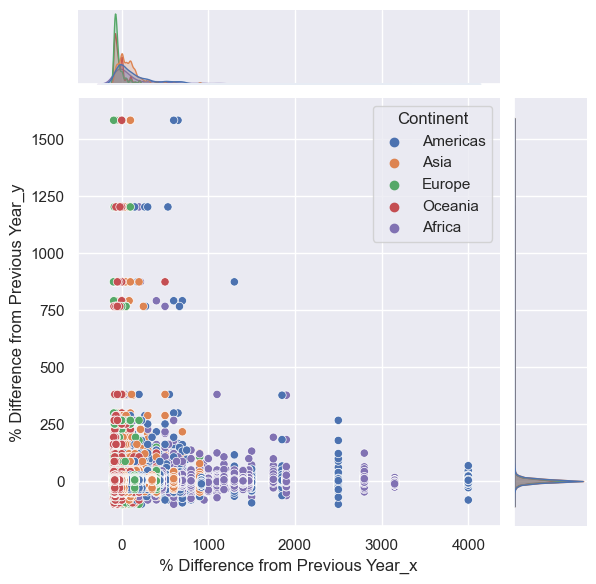

In [ ]:
sns.jointplot(data=merged_df, x="% Difference from Previous Year_x", y="% Difference from Previous Year_y", hue="Continent")

In [ ]:
merged_df = pd.merge(df3[["Continent", "year", "% temp difference"]],
                      df1[["Continent", "Year", "% Difference from Previous Year"]],
                      left_on=["Continent", "year"],
                      right_on=["Continent", "Year"])

# rename the "Year" column to "year"
merged_df = merged_df.rename(columns={"Year": "year"})
merged_df.head(10)

,Continent,year,% temp difference,year,% Difference from Previous Year
0,Asia,1971,0.272653,1971,-80.000000
1,Asia,1971,0.272653,1971,-50.000000
2,Asia,1971,0.272653,1971,-66.666667
3,Asia,1971,0.272653,1971,85.714286
4,Asia,1971,0.272653,1971,0.000000
5,Asia,1971,-8.139843,1971,-80.000000
6,Asia,1971,-8.139843,1971,-50.000000
7,Asia,1971,-8.139843,1971,-66.666667
8,Asia,1971,-8.139843,1971,85.714286
9,Asia,1971,-8.139843,1971,0.000000


### Nat Disaster

<seaborn.axisgrid.PairGrid>

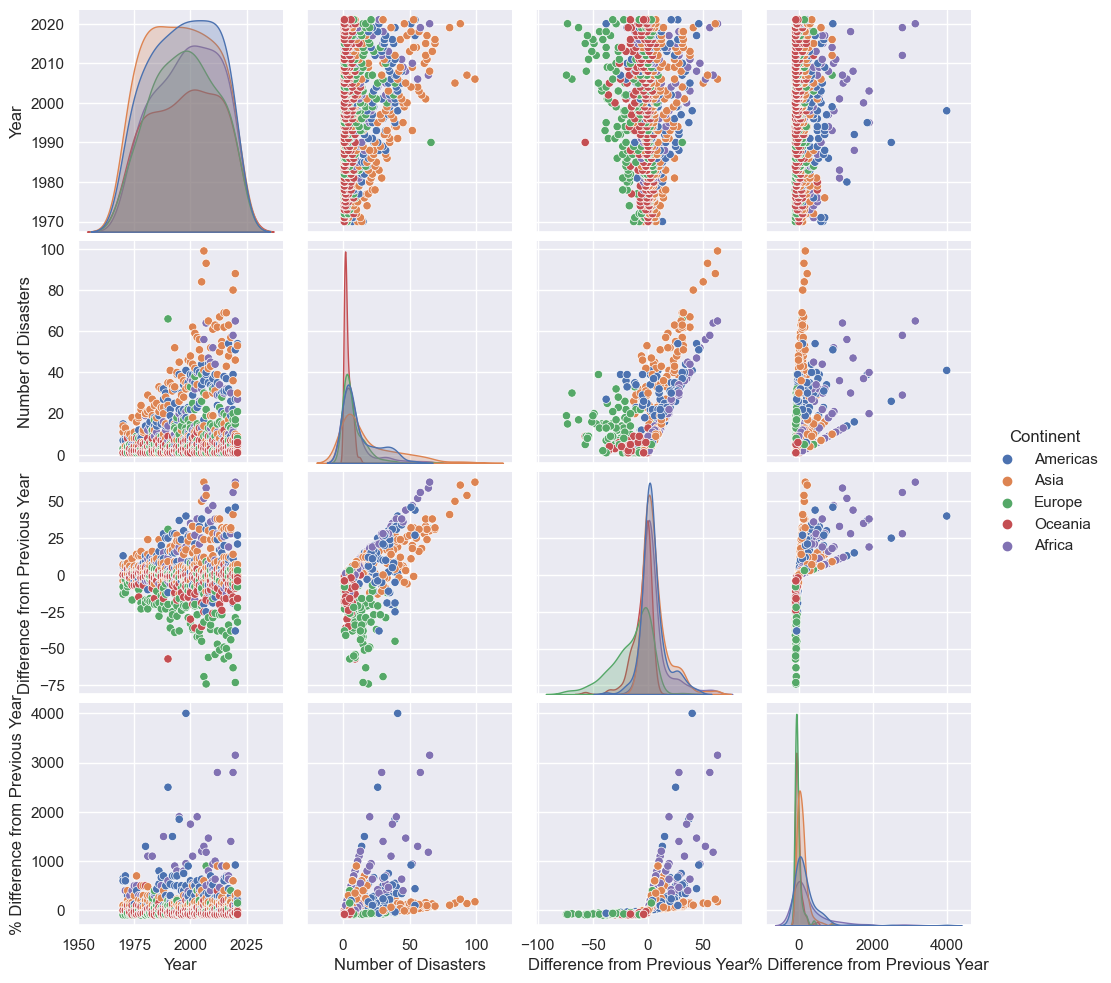

In [ ]:
import seaborn as sns
sns.set_theme()
sns.pairplot(df1, hue="Continent")

In [ ]:
sns.catplot(data = preprocess_emissions_data(), x= "Disaster Type",y = "Year", hue="Continent", kind="box")

ValueError: Could not interpret input 'Disaster Type'

In [ ]:
sns.scatterplot(data = df1, x= "Difference from Previous Year",y = "Year", hue= "Continent").set(title="Number of Natural Disasters in Comparision to Previous Year")


AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

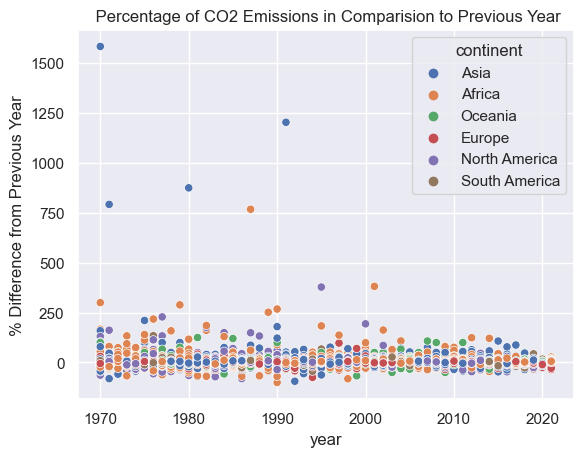

In [ ]:
sns.scatterplot(data = preprocess_emissions_data(), x= "year",y = "% Difference from Previous Year", hue= "continent").set(title=" Percentage of CO2 Emissions in Comparision to Previous Year")
plt.set(ylim=1000)


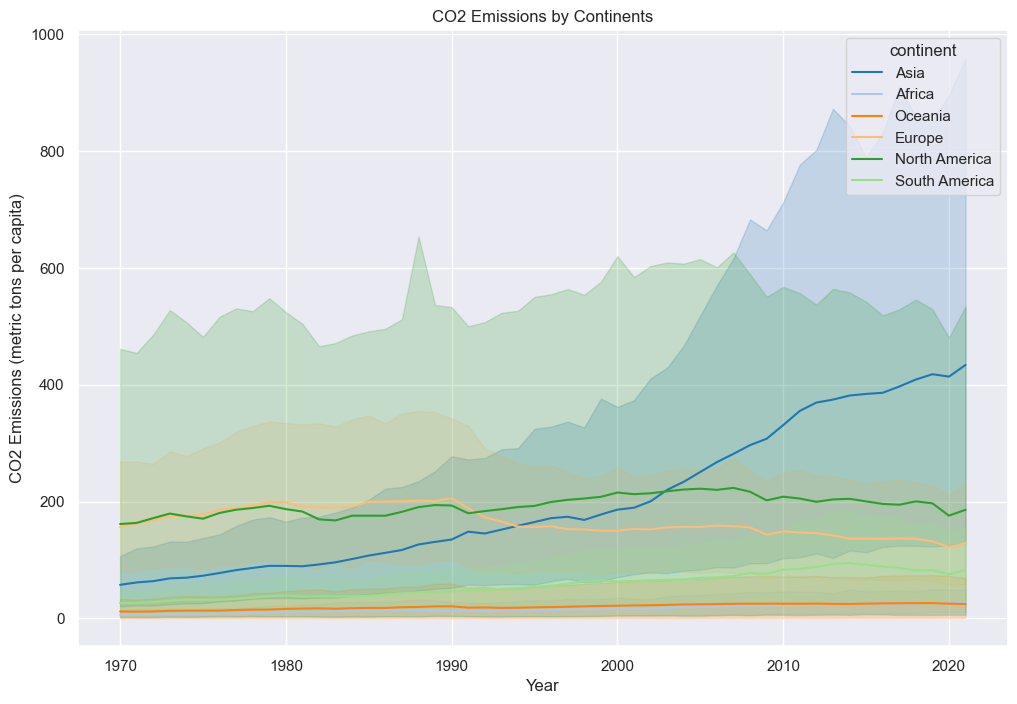

In [ ]:
df2 = preprocess_emissions_data()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x="year", y="co2", hue="continent", palette="tab20")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (metric tons per capita)")
plt.title("CO2 Emissions by Continents")
plt.show()

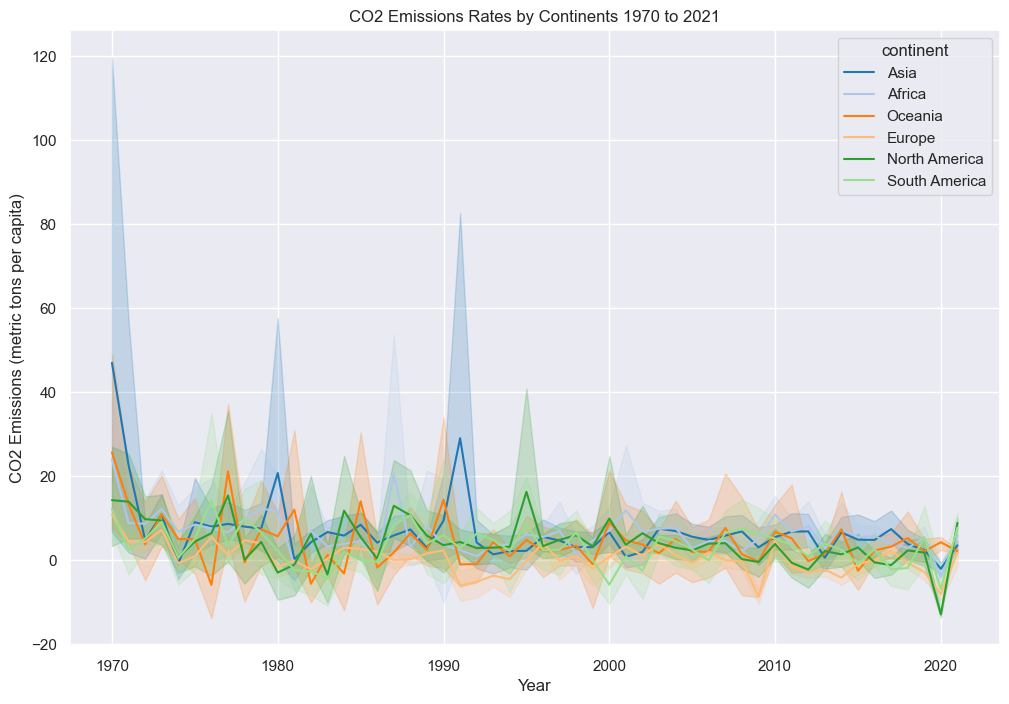

In [ ]:
df2 = preprocess_emissions_data()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x="year", y="% Difference from Previous Year", hue="continent", palette="tab20")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (metric tons per capita)")
plt.title("CO2 Emissions Rates by Continents 1970 to 2021")
plt.show()

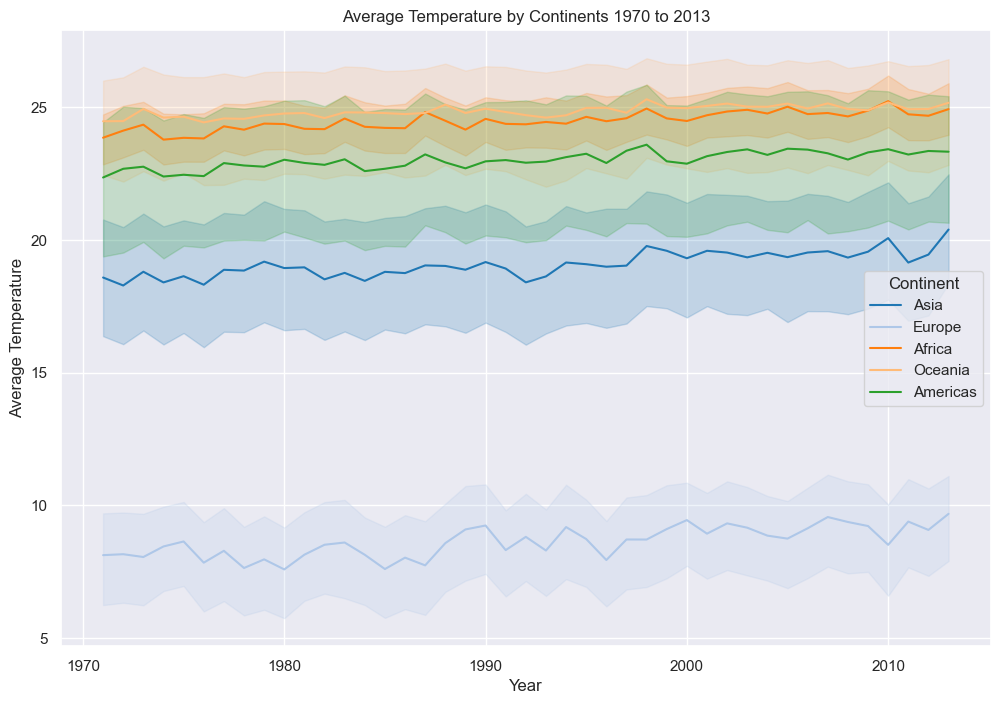

In [ ]:
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df3, x="year", y="AverageTemperature", hue="Continent", palette="tab20")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Average Temperature by Continents 1970 to 2013")
plt.show()

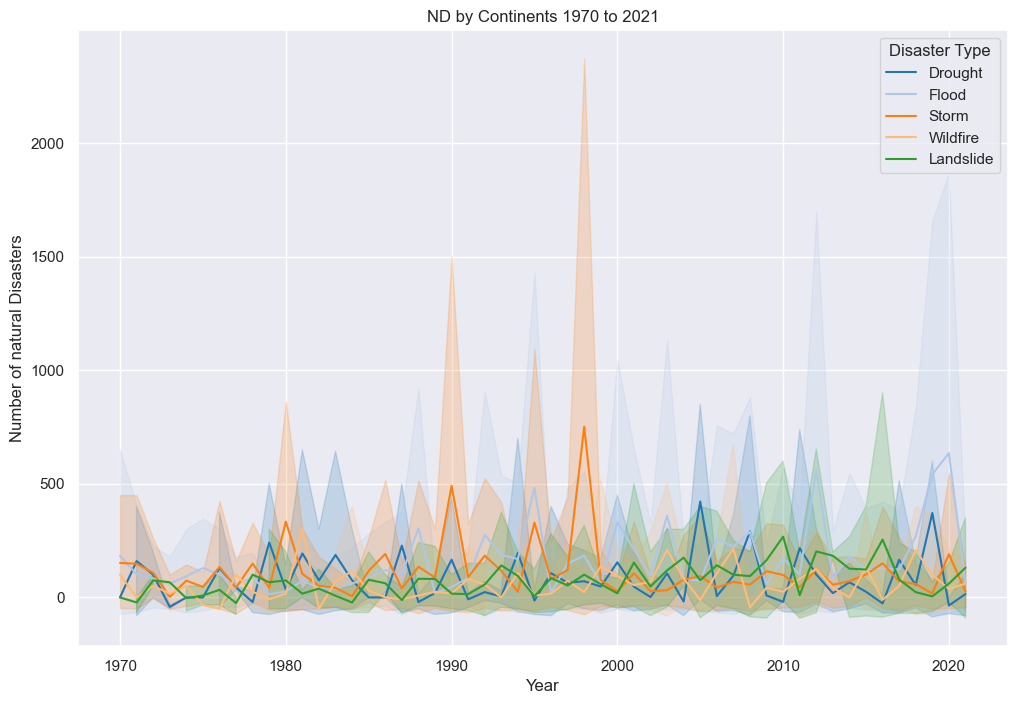

In [ ]:
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df1, x="Year", y="% Difference from Previous Year", hue="Disaster Type", palette="tab20")
plt.xlabel("Year")
plt.ylabel("Number of natural Disasters")
plt.title("ND by Continents 1970 to 2021")
plt.show()

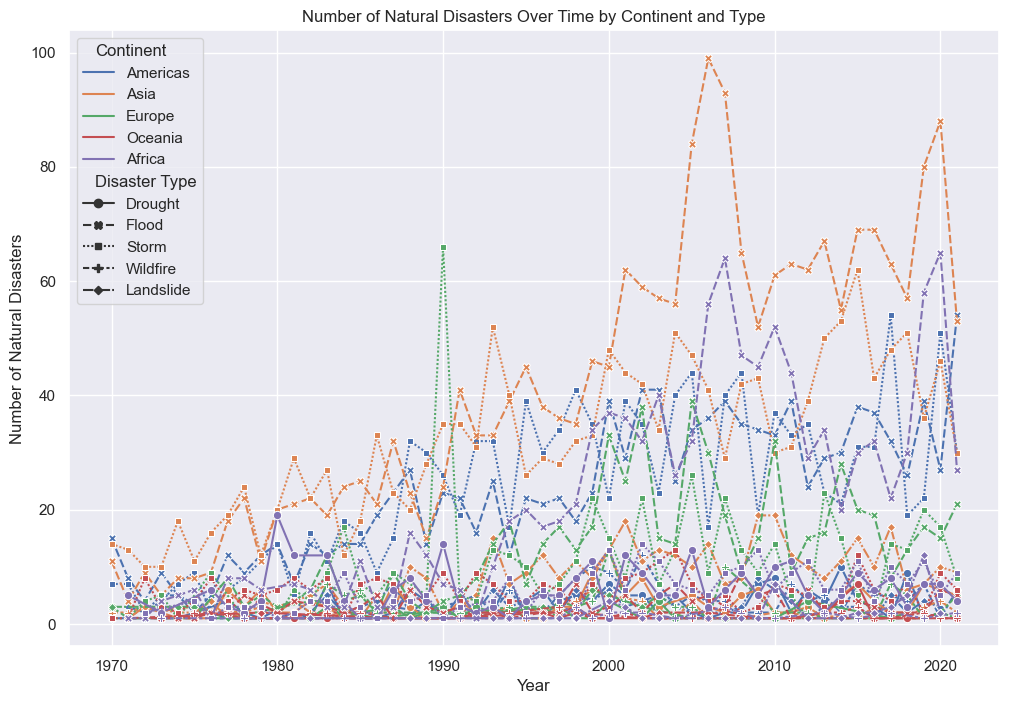

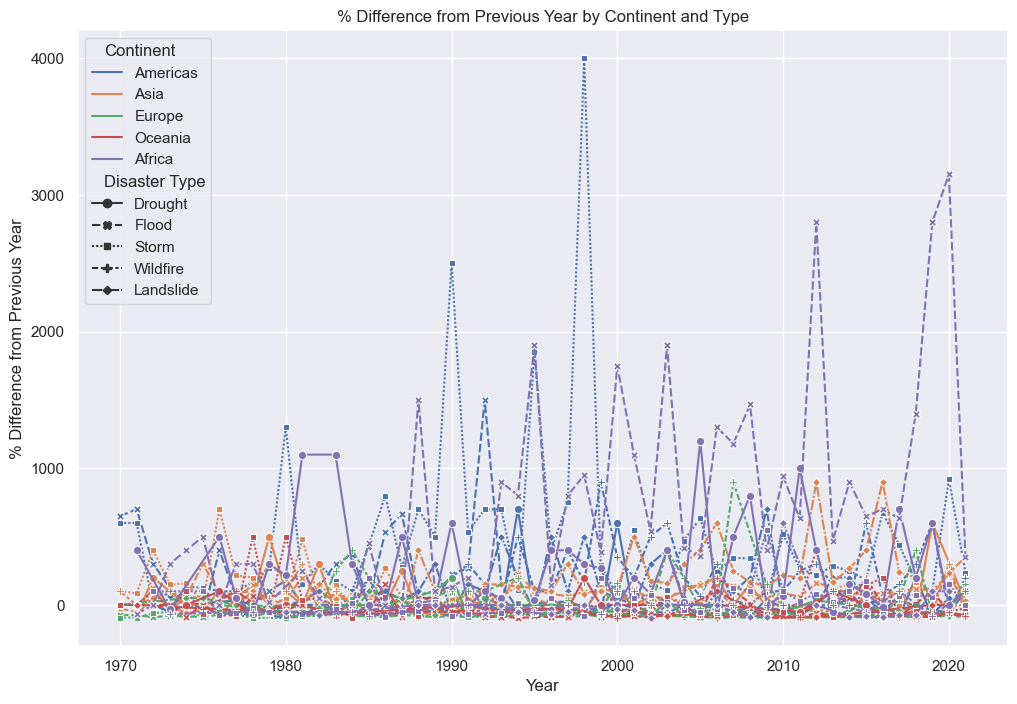

In [ ]:
# lineplot for # of natural disasters 
plt.figure(figsize=(12, 8))
sns.lineplot(data=df1, x="Year", y="Number of Disasters", hue="Continent", style="Disaster Type", markers=True)
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")
plt.title("Number of Natural Disasters Over Time by Continent and Type")
plt.show()

# line plot for % difference of natural disasters
plt.figure(figsize=(12, 8))
sns.lineplot(data=df1, x="Year", y="% Difference from Previous Year", hue="Continent", style="Disaster Type", markers=True)
plt.xlabel("Year")
plt.ylabel("% Difference from Previous Year")
plt.title("% Difference from Previous Year by Continent and Type")
plt.show()

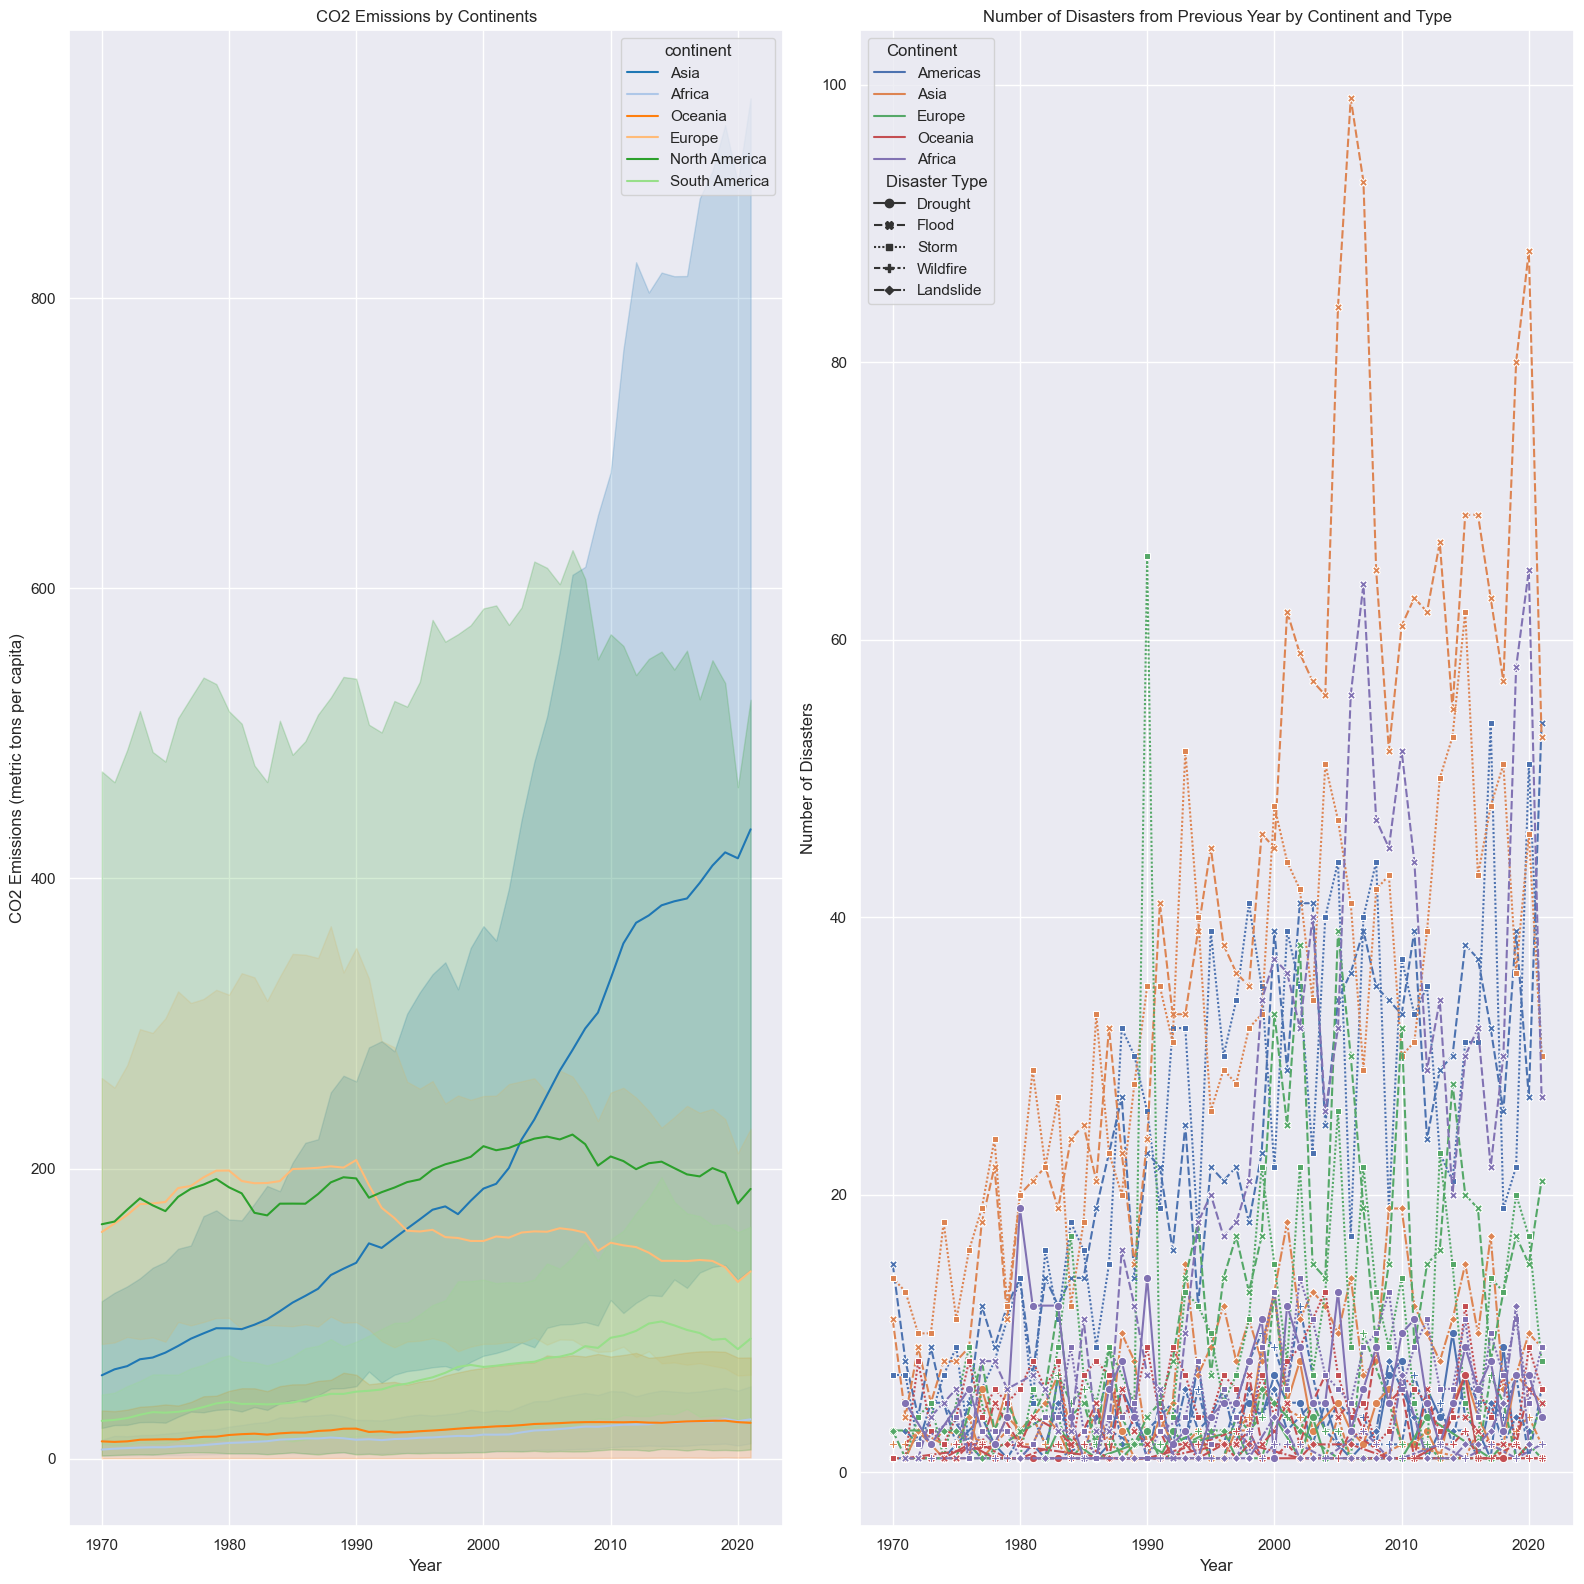

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
# ploting Emissions and Natural disaster's dataset side by side
# left plot: Emissions
sns.lineplot(data=df2, x="year", y="co2", hue="continent", palette="tab20", ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("CO2 Emissions (metric tons per capita)")
axes[0].set_title("CO2 Emissions by Continents")

# right plot: Natural Disasters
sns.lineplot(data=df1, x="Year", y="Number of Disasters", hue="Continent", style="Disaster Type", markers=True, ax=axes[1])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Disasters")
axes[1].set_title("Number of Disasters from Previous Year by Continent and Type")

plt.tight_layout()
plt.show()



At the begining of the 2000's, in the emission plot, we can see the surge in Asia's emission. Comparing to the natural disaster's plot on the right, we see that around the 2000's is also when the number of natural disasters began to increase.

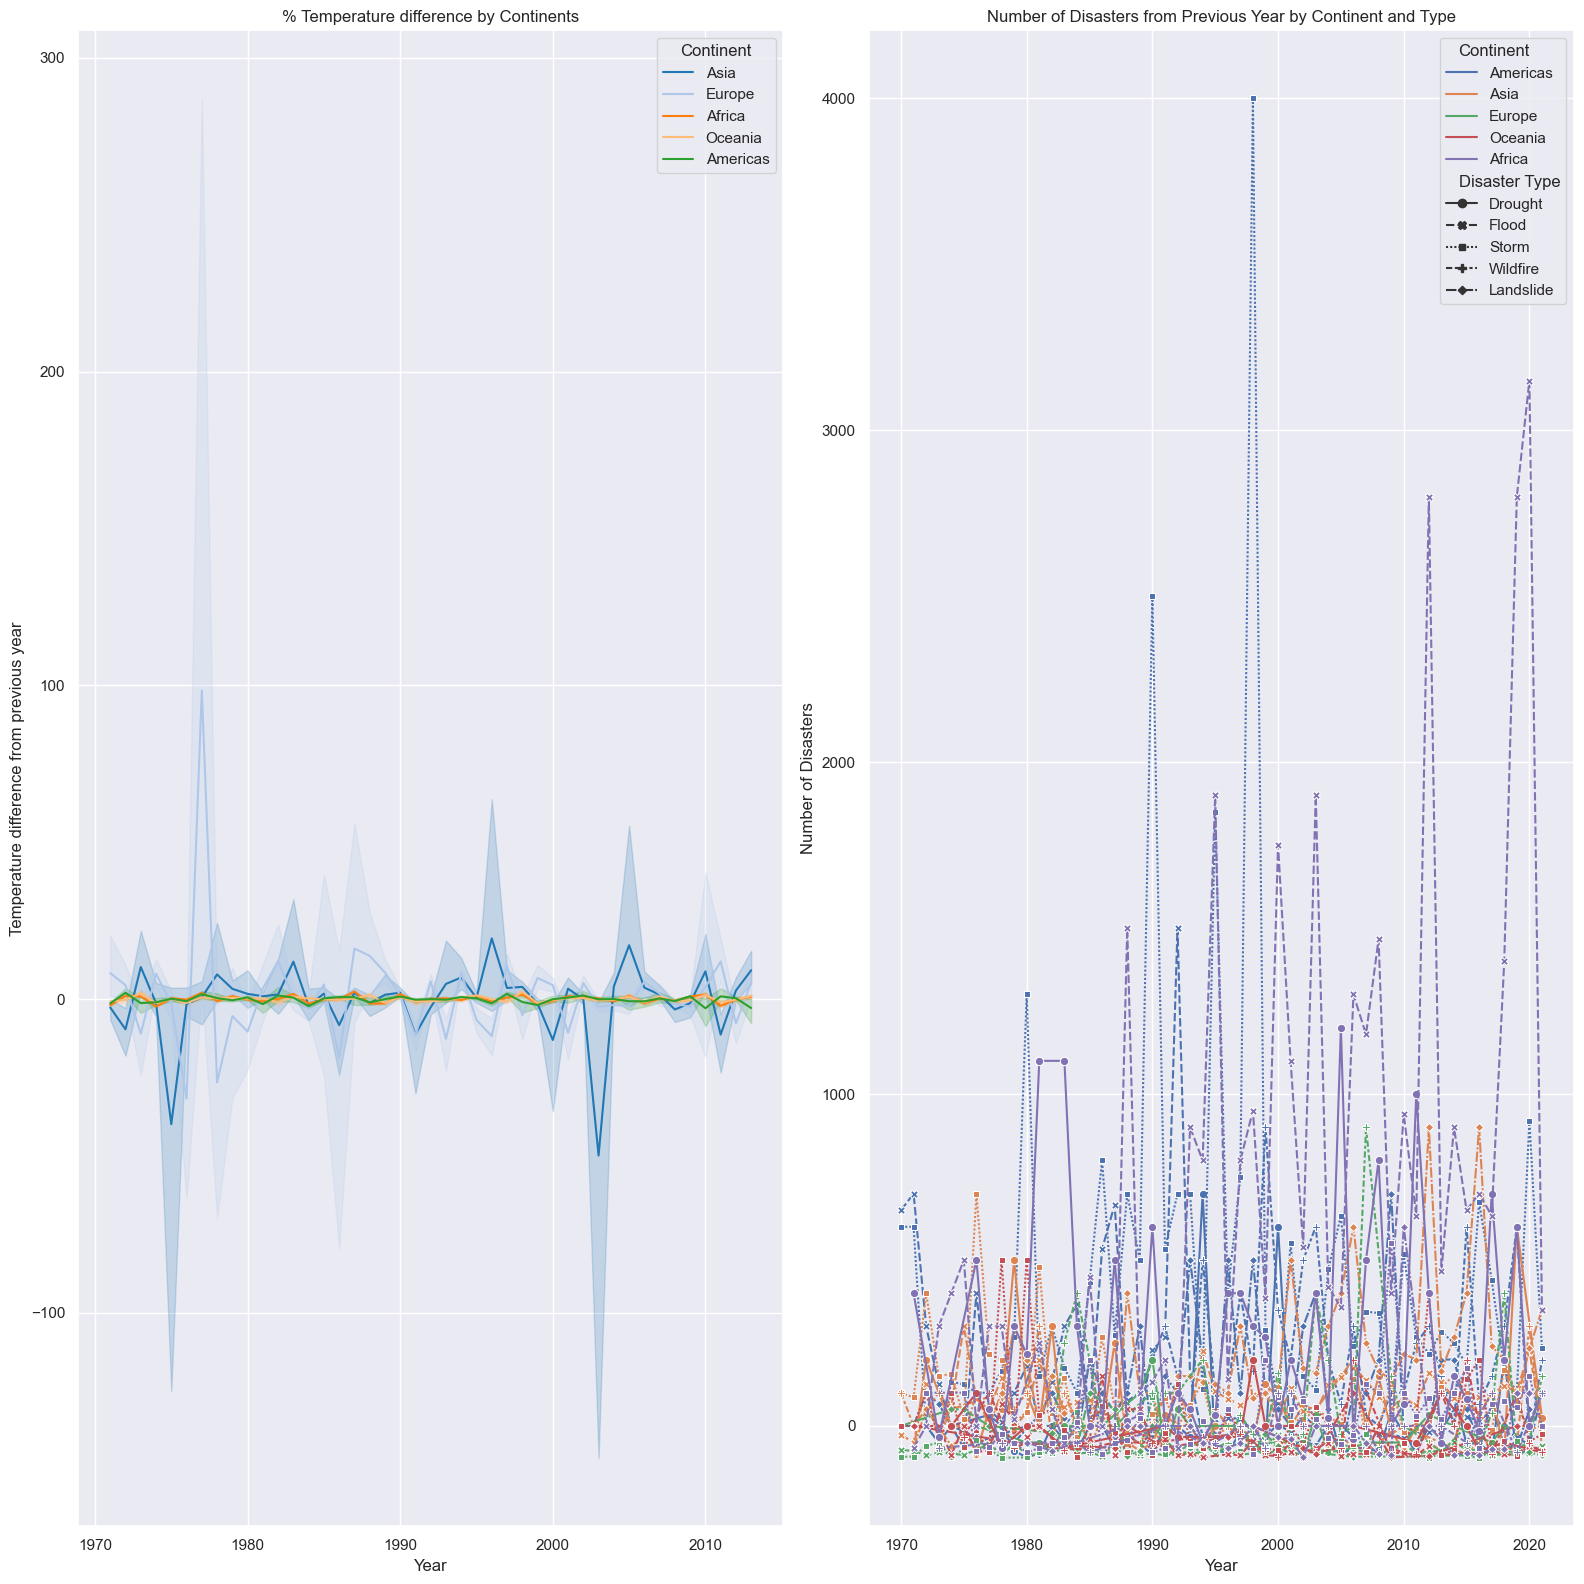

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
# ploting Temperature and Natural disaster's dataset side by side
# left plot: Temperature
sns.lineplot(data=df3, x="year", y="% temp difference", hue="Continent", palette="tab20", ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Temperature difference from previous year")
axes[0].set_title("% Temperature difference by Continents")

# right plot: Natural Disasters
sns.lineplot(data=df1, x="Year", y="% Difference from Previous Year", hue="Continent", style="Disaster Type", markers=True, ax=axes[1])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Disasters")
axes[1].set_title("Number of Disasters from Previous Year by Continent and Type")

plt.tight_layout()
plt.show()
